In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
# for reprot and visualization and find the best threshold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
with open ("../datasets/ICF/icf_level123_def.txt",'r',encoding='utf-8') as infile:
    raw_level123_def = infile.read()

level123_def = raw_level123_def.split('.')
print('num of pretrain sentences:', len(level123_def))

num of pretrain sentences: 320


In [3]:
df_test = pd.read_csv('../datasets/test set/full_test_sep.tsv', sep='\t')
df_icf = pd.read_csv('../datasets/ICF/ICF_def_label.tsv', sep='\t')
df_icf_level2 = pd.read_csv('../datasets/ICF/ICF_level2_def_label.tsv', sep='\t')

In [4]:
icf_def_level2 = df_icf_level2['def-level2'].tolist() # exclude the none label def
labels_level2 = df_icf_level2['label-level2']
labels_level1 = df_icf['label'].tolist()
sentence = df_test['utterances'].tolist()

# transform label to num
df_test.loc[df_test['gold'] == 'learning', 'gold'] = 0
df_test.loc[df_test['gold'] == 'general', 'gold'] = 1
df_test.loc[df_test['gold'] == 'communication', 'gold'] = 2
df_test.loc[df_test['gold'] == 'mobility', 'gold'] = 3
df_test.loc[df_test['gold'] == 'selfcare', 'gold'] = 4
df_test.loc[df_test['gold'] == 'domestic', 'gold'] = 5
df_test.loc[df_test['gold'] == 'interpersonal', 'gold'] = 6
df_test.loc[df_test['gold'] == 'major', 'gold'] = 7
df_test.loc[df_test['gold'] == 'social', 'gold'] = 8
df_test.loc[df_test['gold'] == 'none', 'gold'] = 9

checklabel = [0,1,2,3,4,5,6,7,8,9]
gold = df_test['gold'].tolist()
for n,i in enumerate(gold):
    if i not in checklabel:
        if i != '-'*20:
            print(i,n)
print('clean test set labels')

clean test set labels


In [5]:
if '-'*20 in sentence:
    print('with sep processing')
    sentence = [ i for i in sentence if i != '-'*20]

if '-'*20 in gold:
    print('with sep processing')
    gold = [ i for i in gold if i != '-'*20]

with sep processing
with sep processing


In [6]:
print('num of def:', len(icf_def_level2))
print('num of level1 labels:', len(labels_level1))
print('num of level2 labels:', len(labels_level2))
print('num of test sentences:',len(sentence))

num of def: 34
num of level1 labels: 10
num of level2 labels: 34
num of test sentences: 583


In [7]:
model_name = 'bert-base-uncased'
model_trained = SentenceTransformer('bert-base-uncased')

No sentence-transformers model found with name /home/alice/.cache/torch/sentence_transformers/bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/alice/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fr

In [8]:
sentence_emb_1 = model_trained.encode(sentence)
sentence_emb_2 = model_trained.encode(icf_def_level2)
all_cos_score = cosine_similarity(sentence_emb_1, sentence_emb_2)
print('score dimension:', all_cos_score.shape)

score dimension: (583, 34)


In [9]:
# all_cos_score = all_cos_score.tolist()
max_cos = ["%.2f" % np.max(all_cos_score, axis = None)]
max_score_each_row = ["%.3f" % n for n in np.amax(all_cos_score, axis = 1)]
max_score_each_row = [float(n) for n in max_score_each_row]
max_score_ind = np.argmax(all_cos_score, axis =1)
print(len(max_score_each_row) == len(max_score_ind))
print('max cos:', max_cos)
print('max cos of each row:', 'total rows:', len(max_score_each_row))
print(max_score_each_row)
print('-'*20)
print('max cos index of each row:', 'total rows:', len(max_score_ind))
print(max_score_ind)
# max_score, max_score_ind

True
max cos: ['0.78']
max cos of each row: total rows: 583
[0.583, 0.589, 0.584, 0.626, 0.657, 0.605, 0.643, 0.635, 0.616, 0.578, 0.596, 0.621, 0.636, 0.545, 0.588, 0.71, 0.676, 0.663, 0.672, 0.738, 0.663, 0.682, 0.668, 0.538, 0.609, 0.595, 0.599, 0.594, 0.55, 0.586, 0.657, 0.686, 0.597, 0.655, 0.634, 0.66, 0.659, 0.664, 0.707, 0.65, 0.601, 0.589, 0.587, 0.545, 0.656, 0.573, 0.631, 0.582, 0.554, 0.593, 0.64, 0.585, 0.661, 0.606, 0.626, 0.649, 0.72, 0.6, 0.682, 0.644, 0.645, 0.664, 0.698, 0.696, 0.714, 0.746, 0.644, 0.422, 0.624, 0.618, 0.622, 0.631, 0.405, 0.597, 0.523, 0.578, 0.619, 0.631, 0.655, 0.533, 0.628, 0.612, 0.562, 0.479, 0.522, 0.605, 0.536, 0.494, 0.548, 0.555, 0.566, 0.639, 0.631, 0.569, 0.662, 0.727, 0.579, 0.598, 0.623, 0.637, 0.576, 0.562, 0.568, 0.642, 0.613, 0.629, 0.637, 0.759, 0.564, 0.608, 0.582, 0.646, 0.582, 0.646, 0.493, 0.704, 0.519, 0.568, 0.618, 0.548, 0.59, 0.567, 0.642, 0.652, 0.711, 0.615, 0.629, 0.578, 0.673, 0.659, 0.616, 0.622, 0.642, 0.651, 0.428, 0.6

In [10]:
# convert level 2 labels to level 1 labels so that we can evaluate the predictions with the test set label
# convert list
learning_0 = [0,1,2]
general_1 = [3,4,5,6]
communication_2 = [7,8,9]
mobility_3 = [10,11,12,13]
selfcare_4 = [14,15,16,17,18,19,20]
domestic_5 = [21,22,23]
interpersonal_6 = [24,25]
major_7 = [26,27,28]
social_8 = [29,30,31,32,33]

# convert_list = [learning_0, general_1, communication_2, mobility_3, selfcare_4, domestic_5, interpersonal_6, major_7, social_8]

converted_max_score_ind = []
for ind in max_score_ind:
    if ind in learning_0:
        converted_max_score_ind.append(0)
    elif ind in general_1:
        converted_max_score_ind.append(1)
    elif ind in communication_2:
        converted_max_score_ind.append(2)
    elif ind in mobility_3:
        converted_max_score_ind.append(3)
    elif ind in selfcare_4:
        converted_max_score_ind.append(4)
    elif ind in domestic_5:
        converted_max_score_ind.append(5)
    elif ind in interpersonal_6:
        converted_max_score_ind.append(6)
    elif ind in major_7:
        converted_max_score_ind.append(7)
    elif ind in social_8:
        converted_max_score_ind.append(8)
    else:
        print('wrong range')
        
print('same len before and after converted:', len(max_score_ind)==len(converted_max_score_ind))


same len before and after converted: True


In [11]:
zip_scor_ind = list(zip(max_score_each_row, converted_max_score_ind))

def get_predictions(zip_scor_ind, threshold):
    """"""
    # threshold = 0.10
    predictions = []
    for s, i in zip_scor_ind:
        if s >= threshold:
            predictions.append(i)
        elif s < threshold:
            predictions.append(9) # index 9 means 'none'
        else:
            print('error comparison')
    return predictions

def get_best_fscore(thresholdlist, zip_scor_ind, gold):
    """"""
    list_fscore = []
    for threshold in thresholdlist:
        predictions = get_predictions(zip_scor_ind, threshold)
        list_fscore.append(f1_score(gold, predictions,average='macro'))
    max_fsc = max(list_fscore)
    best_thres = thresholdlist[list_fscore.index(max(list_fscore))]
    return(max_fsc, best_thres)

# predictions = get_predictions(zip_scor_ind, threshold=0.1)
thresholdlist = [0.1, 0.2, 0.25, 0.3,0.4, 0.5,0.53,0.6,0.73]
max_fsc, best_thres = get_best_fscore(thresholdlist, zip_scor_ind, gold)
print('threshold list:',thresholdlist)
print('max-macro fscore:', '%.3f' % max_fsc)
print('best threshold',best_thres)


threshold list: [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.53, 0.6, 0.73]
max-macro fscore: 0.329
best threshold 0.53


In [12]:
# get classification report 
# model_name = './output/tsdae-bert-base-uncased-icf-model'
print(model_name)
predictions = get_predictions(zip_scor_ind, best_thres)
confusion = confusion_matrix(gold, predictions)
report = classification_report(gold, predictions)

print(report)

bert-base-uncased
              precision    recall  f1-score   support

           0       0.38      0.30      0.33        27
           1       0.15      0.21      0.18        33
           2       0.35      0.44      0.39        18
           3       0.19      0.80      0.31        45
           4       0.14      0.45      0.21        31
           5       0.57      0.51      0.54        77
           6       0.76      0.37      0.50        67
           7       0.38      0.14      0.21        35
           8       0.34      0.25      0.29        57
           9       0.80      0.21      0.34       193

    accuracy                           0.34       583
   macro avg       0.41      0.37      0.33       583
weighted avg       0.54      0.34      0.35       583



In [13]:
for i, label in enumerate(labels_level1):
    print(i,label)

0 learning 
1 general 
2 communication
3 mobility
4 selfcare 
5 domestic 
6 interpersonal 
7 major
8 social
9 none 


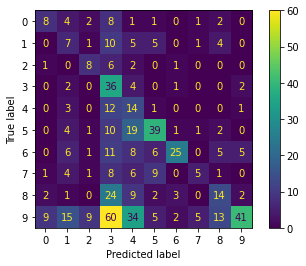

In [14]:
# plot confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=checklabel)
disp.plot()
plt.show()

In [15]:
model = model_name.split('/')[-1]
df_predictions = pd.DataFrame({
    'utterances':sentence,
    'predictions':predictions
    })
df_predictions.to_csv(f'../datasets/predictions/predictions_{model}_level_2.tsv', sep='\t',index=None)